In [15]:
import pandas as pd
df = pd.read_csv('Omnify_Analyst.csv')
df.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost,Leads,Prospects,Payment,Payment Date,Country
0,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,3-Feb-21,USA
1,25-Jan-21,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaN,USA
2,25-Jan-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",13-Mar-21,USA
3,25-Jan-21,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaN,USA
4,25-Jan-21,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaN,USA


In [20]:
#creating the new dataset with removing the columns with null values in payment column
df1=df.dropna(subset='Payment')

In [22]:
df1

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost,Leads,Prospects,Payment,Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,3-Feb-21,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",13-Mar-21,USA
57,2021-02-08,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,4,27,12.05,0,1,$980,15-Feb-21,USA
83,2021-02-15,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,3,31,15.97,0,1,"$1,788",1-Mar-21,USA
148,2021-03-01,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,5,239,42.26,0,1,$980,29-Apr-21,USA
235,2021-03-22,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,12,35,50.15,0,3,"$2,388",3-Apr-21,USA
315,2021-04-12,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Phrase,Phrase,reservation management system,USD,2,6,19.64,0,1,"$2,388",1-May-21,USA
389,2021-05-03,EK_Generic_Tri-Tok_Yoga,Yoga_Studio_Software_Phrase,Phrase,yoga studio software,USD,8,255,65.66,0,2,"$1,188",4-May-21,USA


In [26]:
df1['Payment']

0        $980
2      $1,188
57       $980
83     $1,788
148      $980
235    $2,388
315    $2,388
389    $1,188
Name: Payment, dtype: object

In [33]:
df1['Payment']=df1['Payment'].str.replace('$','')
df1['Payment']=df1['Payment'].str.replace(',','')

C:\Users\SIVAPA~1\AppData\Local\Temp/ipykernel_564/3326567053.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Payment']=df1['Payment'].str.replace('$','')


In [34]:
df1['Payment']

0       980
2      1188
57      980
83     1788
148     980
235    2388
315    2388
389    1188
Name: Payment, dtype: object

In [35]:
df1['Payment'] = pd.to_numeric(df1['Payment'])

In [38]:
df1

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost,Leads,Prospects,Payment,Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980,3-Feb-21,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188,13-Mar-21,USA
57,2021-02-08,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,4,27,12.05,0,1,980,15-Feb-21,USA
83,2021-02-15,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,3,31,15.97,0,1,1788,1-Mar-21,USA
148,2021-03-01,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,5,239,42.26,0,1,980,29-Apr-21,USA
235,2021-03-22,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,12,35,50.15,0,3,2388,3-Apr-21,USA
315,2021-04-12,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Phrase,Phrase,reservation management system,USD,2,6,19.64,0,1,2388,1-May-21,USA
389,2021-05-03,EK_Generic_Tri-Tok_Yoga,Yoga_Studio_Software_Phrase,Phrase,yoga studio software,USD,8,255,65.66,0,2,1188,4-May-21,USA


In [40]:
df1['Returns %'] = (df1['Payment'] / df1['Cost']) * 100

In [42]:
df1

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost,Leads,Prospects,Payment,Payment Date,Country,Returns %
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980,3-Feb-21,USA,2556.744065
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188,13-Mar-21,USA,2632.395302
57,2021-02-08,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,4,27,12.05,0,1,980,15-Feb-21,USA,8132.780083
83,2021-02-15,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,3,31,15.97,0,1,1788,1-Mar-21,USA,11195.992486
148,2021-03-01,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,5,239,42.26,0,1,980,29-Apr-21,USA,2318.977757
235,2021-03-22,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,12,35,50.15,0,3,2388,3-Apr-21,USA,4761.714855
315,2021-04-12,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Phrase,Phrase,reservation management system,USD,2,6,19.64,0,1,2388,1-May-21,USA,12158.859470
389,2021-05-03,EK_Generic_Tri-Tok_Yoga,Yoga_Studio_Software_Phrase,Phrase,yoga studio software,USD,8,255,65.66,0,2,1188,4-May-21,USA,1809.320743


In [46]:
df1['Week'] = pd.to_datetime(df1['Week'])

In [47]:
#From the week column to extract the week and month
df1['Week'] = pd.to_datetime(df1['Week'])
df1['Week_C'] = df1['Week'].dt.week
df1['Month'] = df1['Week'].dt.month


C:\Users\SIVAPA~1\AppData\Local\Temp/ipykernel_564/1439563641.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1['Week_C'] = df1['Week'].dt.week


In [48]:
df1

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost,Leads,Prospects,Payment,Payment Date,Country,Returns %,Week_C,Month
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980,3-Feb-21,USA,2556.744065,4,1
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188,13-Mar-21,USA,2632.395302,4,1
57,2021-02-08,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,4,27,12.05,0,1,980,15-Feb-21,USA,8132.780083,6,2
83,2021-02-15,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,3,31,15.97,0,1,1788,1-Mar-21,USA,11195.992486,7,2
148,2021-03-01,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,5,239,42.26,0,1,980,29-Apr-21,USA,2318.977757,9,3
235,2021-03-22,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,12,35,50.15,0,3,2388,3-Apr-21,USA,4761.714855,12,3
315,2021-04-12,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Phrase,Phrase,reservation management system,USD,2,6,19.64,0,1,2388,1-May-21,USA,12158.859470,15,4
389,2021-05-03,EK_Generic_Tri-Tok_Yoga,Yoga_Studio_Software_Phrase,Phrase,yoga studio software,USD,8,255,65.66,0,2,1188,4-May-21,USA,1809.320743,18,5


In [49]:
weekly_report = df1.groupby('Week_C').agg({
    'Cost': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Prospects': 'sum',
    'Payment': 'sum',
    'Returns %': 'mean'
}).reset_index()

In [51]:
weekly_report

,Week_C,Cost,Impressions,Clicks,Prospects,Payment,Returns %
0,4,83.46,171,6,2,2168,2594.569684
1,6,12.05,27,4,1,980,8132.780083
2,7,15.97,31,3,1,1788,11195.992486
3,9,42.26,239,5,1,980,2318.977757
4,12,50.15,35,12,3,2388,4761.714855
5,15,19.64,6,2,1,2388,12158.859470
6,18,65.66,255,8,2,1188,1809.320743


In [52]:
Monthly_report = df1.groupby('Month').agg({
    'Cost': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Prospects': 'sum',
    'Payment': 'sum',
    'Returns %': 'mean'
}).reset_index()

In [53]:
Monthly_report

,Month,Cost,Impressions,Clicks,Prospects,Payment,Returns %
0,1,83.46,171,6,2,2168,2594.569684
1,2,28.02,58,7,2,2768,9664.386284
2,3,92.41,274,17,4,3368,3540.346306
3,4,19.64,6,2,1,2388,12158.859470
4,5,65.66,255,8,2,1188,1809.320743


In [54]:
import matplotlib.pyplot as plt

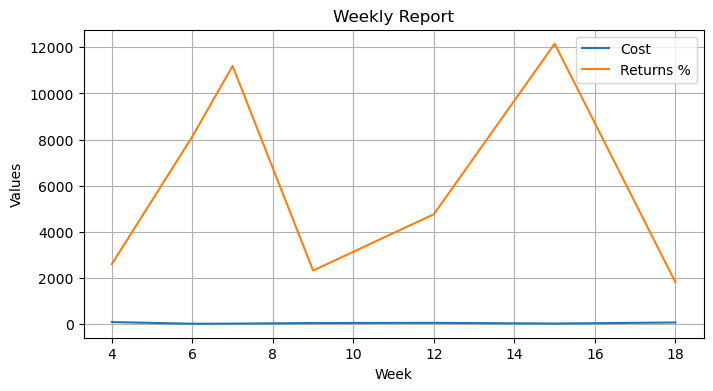

In [55]:
#Weekly report as line plot
plt.figure(figsize=(8, 4))
plt.plot(weekly_report['Week_C'], weekly_report['Cost'], label='Cost')
plt.plot(weekly_report['Week_C'], weekly_report['Returns %'], label='Returns %')
plt.xlabel('Week')
plt.ylabel('Values')
plt.title('Weekly Report')
plt.legend()
plt.grid()
plt.show()

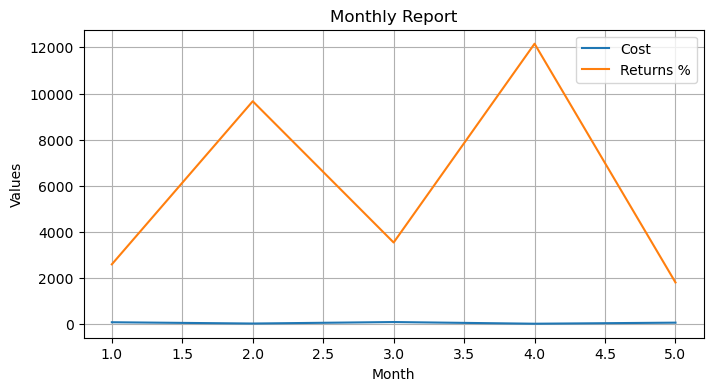

In [56]:
#Monthly report as line plot
plt.figure(figsize=(8, 4))
plt.plot(Monthly_report['Month'], Monthly_report['Cost'], label='Cost')
plt.plot(Monthly_report['Month'], Monthly_report['Returns %'], label='Returns %')
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Report')
plt.legend()
plt.grid()
plt.show()

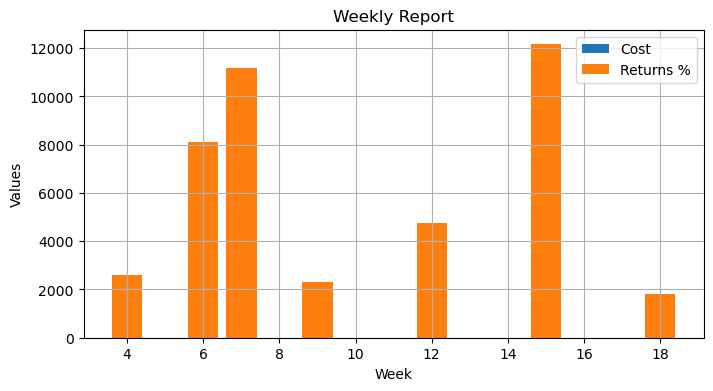

In [58]:
#Weekly report as bar plot
plt.figure(figsize=(8, 4))
plt.bar(weekly_report['Week_C'], weekly_report['Cost'], label='Cost')
plt.bar(weekly_report['Week_C'], weekly_report['Returns %'], label='Returns %')
plt.xlabel('Week')
plt.ylabel('Values')
plt.title('Weekly Report')
plt.legend()
plt.grid()
plt.show()

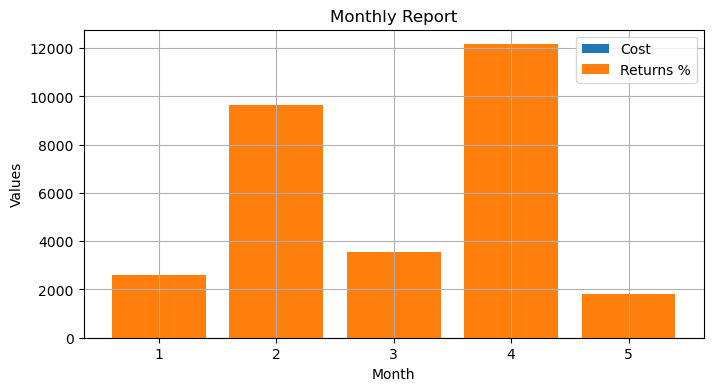

In [59]:
#Monthly report as bar plot
plt.figure(figsize=(8, 4))
plt.bar(Monthly_report['Month'], Monthly_report['Cost'], label='Cost')
plt.bar(Monthly_report['Month'], Monthly_report['Returns %'], label='Returns %')
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Report')
plt.legend()
plt.grid()
plt.show()

In [80]:
df2 = pd.read_csv('Omnify_Analyst.csv')
df2.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost,Leads,Prospects,Payment,Payment Date,Country
0,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,3-Feb-21,USA
1,25-Jan-21,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaN,USA
2,25-Jan-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",13-Mar-21,USA
3,25-Jan-21,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaN,USA
4,25-Jan-21,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaN,USA


In [81]:
df2['Payment']=df2['Payment'].str.replace('$','')
df2['Payment']=df2['Payment'].str.replace(',','')
df2['Payment'] = pd.to_numeric(df2['Payment'])

C:\Users\SIVAPA~1\AppData\Local\Temp/ipykernel_564/1492563813.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['Payment']=df2['Payment'].str.replace('$','')


In [82]:
df2

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost,Leads,Prospects,Payment,Payment Date,Country
0,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,3-Feb-21,USA
1,25-Jan-21,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaN,USA
2,25-Jan-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,13-Mar-21,USA
3,25-Jan-21,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaN,USA
4,25-Jan-21,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaN,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3-May-21,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,0,1,0.00,0,0,NaN,NaN,USA
414,3-May-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Exact,Exact,yoga studio booking software,USD,0,6,0.00,0,0,NaN,NaN,USA
415,3-May-21,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,0,0,0.00,0,0,NaN,NaN,USA
416,3-May-21,EK_Generic_Quad-Tok_Pilates,Pilates_Studio_Booking_Software_Broad,Broad,pilates studio booking software,USD,0,1,0.00,0,0,NaN,NaN,USA


In [83]:
df2['Payment'].fillna(0, inplace=True)

In [84]:
df2

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost,Leads,Prospects,Payment,Payment Date,Country
0,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,3-Feb-21,USA
1,25-Jan-21,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,0.0,NaN,USA
2,25-Jan-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,13-Mar-21,USA
3,25-Jan-21,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,0.0,NaN,USA
4,25-Jan-21,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,0.0,NaN,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3-May-21,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,0,1,0.00,0,0,0.0,NaN,USA
414,3-May-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Exact,Exact,yoga studio booking software,USD,0,6,0.00,0,0,0.0,NaN,USA
415,3-May-21,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,0,0,0.00,0,0,0.0,NaN,USA
416,3-May-21,EK_Generic_Quad-Tok_Pilates,Pilates_Studio_Booking_Software_Broad,Broad,pilates studio booking software,USD,0,1,0.00,0,0,0.0,NaN,USA


In [85]:
df2['Returns %']=((df2['Payment'] - df2['Cost']) / df2['Cost']) * 100

In [86]:
df2.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost,Leads,Prospects,Payment,Payment Date,Country,Returns %
0,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,3-Feb-21,USA,2456.744065
1,25-Jan-21,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,0.0,NaN,USA,-100.000000
2,25-Jan-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,13-Mar-21,USA,2532.395302
3,25-Jan-21,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,0.0,NaN,USA,-100.000000
4,25-Jan-21,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,0.0,NaN,USA,-100.000000


In [88]:
#From the week column to extract the week and month
df2['Week'] = pd.to_datetime(df2['Week'])
df2['Week_C'] = df2['Week'].dt.week
df2['Month'] = df2['Week'].dt.month

C:\Users\SIVAPA~1\AppData\Local\Temp/ipykernel_564/334448038.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2['Week_C'] = df2['Week'].dt.week


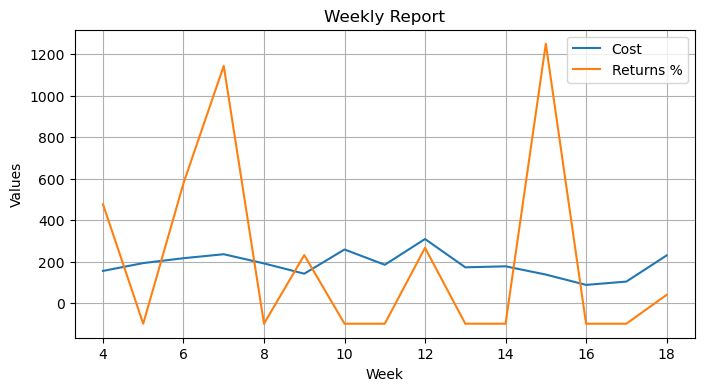

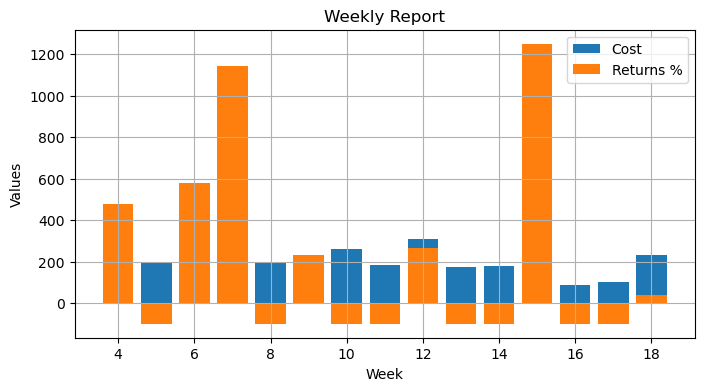

In [92]:
weekly_report = df2.groupby('Week_C').agg({
    'Cost': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Prospects': 'sum',
    'Payment': 'sum',
    'Returns %': 'mean'
}).reset_index()
#Weekly report as line plot
plt.figure(figsize=(8, 4))
plt.plot(weekly_report['Week_C'], weekly_report['Cost'], label='Cost')
plt.plot(weekly_report['Week_C'], weekly_report['Returns %'], label='Returns %')
plt.xlabel('Week')
plt.ylabel('Values')
plt.title('Weekly Report')
plt.legend()
plt.grid()
plt.show()
#Weekly report as bar plot
plt.figure(figsize=(8, 4))
plt.bar(weekly_report['Week_C'], weekly_report['Cost'], label='Cost')
plt.bar(weekly_report['Week_C'], weekly_report['Returns %'], label='Returns %')
plt.xlabel('Week')
plt.ylabel('Values')
plt.title('Weekly Report')
plt.legend()
plt.grid()
plt.show()

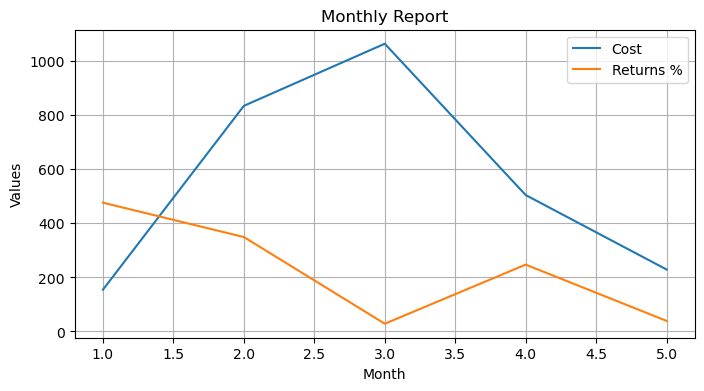

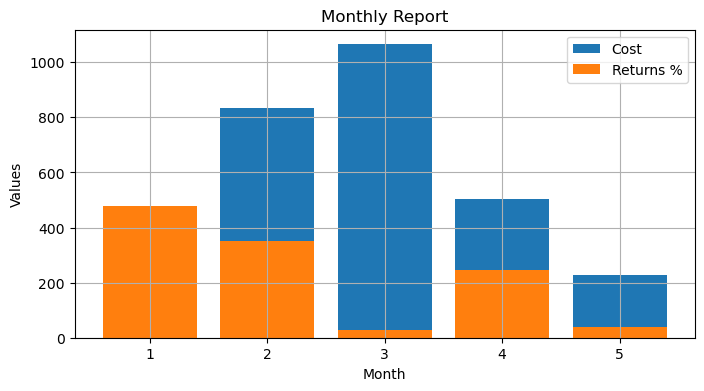

In [93]:
Monthly_report = df2.groupby('Month').agg({
    'Cost': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Prospects': 'sum',
    'Payment': 'sum',
    'Returns %': 'mean'
}).reset_index()
#Monthly report as line plot
plt.figure(figsize=(8, 4))
plt.plot(Monthly_report['Month'], Monthly_report['Cost'], label='Cost')
plt.plot(Monthly_report['Month'], Monthly_report['Returns %'], label='Returns %')
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Report')
plt.legend()
plt.grid()
plt.show()
#Monthly report as bar plot
plt.figure(figsize=(8, 4))
plt.bar(Monthly_report['Month'], Monthly_report['Cost'], label='Cost')
plt.bar(Monthly_report['Month'], Monthly_report['Returns %'], label='Returns %')
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Report')
plt.legend()
plt.grid()
plt.show()